# MAS DSE 200: Homework 2 - Pandas

#### Tasks: 

- Introduction to Pandas.  
  
- Submission on Gradescope:
  - Submit this Jupyter notebook to "Homework 2"

#### Due date: Monday 10/18/2021 at 11:59 PM PST

---

Remember: when in doubt, read the documentation first.

Python - https://docs.python.org/3/

NumPy - https://numpy.org/doc/stable/

pandas - https://pandas.pydata.org/docs/

## Instructions
 
* You don’t need to explain your approach (unless specified) so please be concise in your submission. 
* To obtain full marks for a question, both the answer and the code should be correct. 
* Completely wrong (or missing) code with correct answer will result in zero marks. 
* Please code the solution in the space provided.

### Imports

Import necessary packages

In [1]:
import pandas as pd
import numpy as np

## Part 1: Titanic

### Preliminaries

* Grab the dataset from `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv` and store it in a pandas dataframe called `passengers`.

In [2]:
# YOUR CODE HERE
df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv")

### 1: Get to know your data - **2 points**

**1.1**: Print the first 15 entries in the dataframe to see what the columns are and what some values will look like - **0.5 points**

In [3]:
# YOUR CODE HERE
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**1.2**: Next, set the index of the dataframe to the `PassengerId` column, and print the first 10 elements again to ensure the change took place - **0.5 point**

In [4]:
# YOUR CODE HERE
df.set_index('PassengerId', inplace=True)
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


**1.3**: How many samples are there in this dataset? - **0.5 point**

In [5]:
# YOUR CODE HERE
len(df)

891

**1.4** How many samples contain `null`/`NaN` in atleast one of the columns - **0.5 point**

In [6]:
# YOUR CODE HERE
len(df) - len(df.dropna())

708

### 2: Summary statistics - **3 point**

**2.1**: Print the `min`, `max`, `mean` and `median` of *age* and *fare* of all passengers - **1 point**

Note - Only the above mentioned statistical measures(min, max, mean, median) and columns(age and fare) are expected to be a part of the output

Hint - Look at [`DataFrame.agg`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html#pandas.DataFrame.agg)

In [7]:
# YOUR CODE HERE
df[['Age', 'Fare']].agg(['min','max','mean', 'median'])

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
mean,29.699118,32.204208
median,28.000000,14.454200


**2.2**: What is the average ticket fare price for male vs female passengers on the Titanic? - **1 point**

Note - The output should only have `Sex` and `Fare`

*Hint* - Look at [`DataFrame.groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby)

In [8]:
# YOUR CODE HERE
df[['Sex', 'Fare']].groupby('Sex').mean()

,Fare
Sex,
female,44.479818
male,25.523893


**2.3** What is the `mean`, `median` and `mode` age for each of the sex and cabin class combinations? - **1 point**

Example - (Pclass=1, Sex=male), (Pclass=2, Sex=female) etc.

In [9]:
# YOUR CODE HERE

cols = ["Pclass", "Sex"]

group_df = df.groupby(cols).Age
mean_df = group_df.mean().to_frame('Mean age')
median_df = group_df.median().to_frame('Median age')
mode_df = group_df.apply(pd.Series.mode).to_frame('Mode age')

mean_df.merge(median_df, on=cols).merge(mode_df, on=cols)

Mean age  Median age  Mode age
Pclass Sex                                    
1      female  34.611765        35.0      35.0
       male    41.281386        40.0      36.0
2      female  28.722973        28.0      24.0
       male    30.740707        30.0      23.0
       male    30.740707        30.0      34.0
3      female  21.750000        21.5      18.0
       male    26.507589        25.0      22.0

In [10]:
# Alternate solution
df[['Sex', 'Pclass', 'Age']].groupby(['Pclass', 'Sex']).agg(['mean', 'median', pd.Series.mode])

Age                     
                    mean median          mode
Pclass Sex                                   
1      female  34.611765   35.0          35.0
       male    41.281386   40.0          36.0
2      female  28.722973   28.0          24.0
       male    30.740707   30.0  [23.0, 34.0]
3      female  21.750000   21.5          18.0
       male    26.507589   25.0          22.0

### 3:  Number of passengers in different classes - **2 point**

**3.1**: What is the number of passenges in different classes according to this dataset? (Hint: Pclass represents the class of a passenger.) - **0.5 points**

In [11]:
# YOUR CODE HERE
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**3.2** How many passengers in 1st class (`Pclass = 1`) are women (`Sex = female`) above the age of 27? - **0.5 points**

In [12]:
# YOUR CODE HERE

len(df[(df.Pclass == 1) & (df.Sex == 'female') & (df.Age > 27)])

56

**3.3** What fraction of passengers from each class survived(`Survived=1`)? - **1 point**

In [13]:
# YOUR CODE HERE
count_df = df.groupby(['Pclass', 'Survived']).Survived.count().unstack(level=1)
count_df['Survived_Percentage'] = count_df[1] / (count_df[0] + count_df[1])
count_df['Survived_Percentage']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived_Percentage, dtype: float64

In [14]:
# Alternate solution
df[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### 4:  Fares - **2 points**

**4.1**: How many different fares were charged on the Titanic based on the dataset? - **0.5 point**

In [15]:
# YOUR CODE HERE
len(df.Fare.unique())

248

**4.2**: Find the top 10 fares charged from the passengers. **Report these fare values**, and then **calculate the total number of passengers** who paid one of these fares - **1 point**

In [16]:
# YOUR CODE HERE
top_fares = df.Fare.value_counts().head(10)
top_fares

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
10.5000    24
7.9250     18
7.7750     16
0.0000     15
26.5500    15
Name: Fare, dtype: int64

In [17]:
# Passengers paying top 10 fares
top_fares.sum()

276

**4.3**: Create a new DataFrame called `passengers_filtered`, that includes only entries of passengers who paid one of these top 10 fares. Report the number of samples in the new DataFrame - **0.5 point**

**Hint:** Check out the Pandas Series function [isin](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html)

In [18]:
# YOUR CODE HERE
passengers_filtered = df[df.Fare.isin(top_fares)]
len(passengers_filtered)

10

### 5:  Ages - **1 points**

**5.1**: How many passengers on the Titanic were within one standard deviation of the mean age? How many of these were females over the age of 25? - **1 points**

In [19]:
# YOUR CODE HERE
std = df.Age.std()
mean = df.Age.mean()

age_df = df[(df.Age >= (mean - std)) & (df.Age <= (mean + std))]
len(age_df)

516

In [20]:
female_above_25 = age_df[(age_df.Sex == "female") & (age_df.Age > 25)]
len(female_above_25)

103

## Part 2: Beer Review - 5 points

Use the `beer_reviews` dataframe created for you

In [21]:
reviews = []
for line in open("beer_50000.json").readlines():
    reviews.append(eval(line))

beer_reviews = pd.DataFrame(reviews)

In [22]:
beer_reviews.columns

Index(['review/appearance', 'beer/style', 'review/palate', 'review/taste',
       'beer/name', 'review/timeUnix', 'beer/ABV', 'beer/beerId',
       'beer/brewerId', 'review/timeStruct', 'review/overall', 'review/text',
       'user/profileName', 'review/aroma', 'user/gender', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/ageInSeconds'],
      dtype='object')

In [23]:
beer_reviews.head()

,review/appearance,beer/style,review/palate,review/taste,beer/name,review/timeUnix,beer/ABV,beer/beerId,beer/brewerId,review/timeStruct,review/overall,review/text,user/profileName,review/aroma,user/gender,user/birthdayRaw,user/birthdayUnix,user/ageInSeconds
0,2.5,Hefeweizen,1.5,1.5,Sausa Weizen,1234817823,5.0,47986,10325,"{'isdst': 0, 'mday': 16, 'hour': 20, 'min': 57...",1.5,A lot of foam. But a lot.\tIn the smell some b...,stcules,2.0,NaN,NaN,NaN,NaN
1,3.0,English Strong Ale,3.0,3.0,Red Moon,1235915097,6.2,48213,10325,"{'isdst': 0, 'mday': 1, 'hour': 13, 'min': 44,...",3.0,"Dark red color, light beige foam, average.\tIn...",stcules,2.5,NaN,NaN,NaN,NaN
2,3.0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,1235916604,6.5,48215,10325,"{'isdst': 0, 'mday': 1, 'hour': 14, 'min': 10,...",3.0,"Almost totally black. Beige foam, quite compac...",stcules,2.5,NaN,NaN,NaN,NaN
3,3.5,German Pilsener,2.5,3.0,Sausa Pils,1234725145,5.0,47969,10325,"{'isdst': 0, 'mday': 15, 'hour': 19, 'min': 12...",3.0,"Golden yellow color. White, compact foam, quit...",stcules,3.0,NaN,NaN,NaN,NaN
4,4.0,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,1293735206,7.7,64883,1075,"{'isdst': 0, 'mday': 30, 'hour': 18, 'min': 53...",4.0,"According to the website, the style for the Ca...",johnmichaelsen,4.5,Male,"Jun 16, 1901",-2.163082e+09,3.581417e+09


**6.1**: Which are the top 15 beers (`beer/style`) with the highest average ratings (`review/overall`)? - **1 point**

In [24]:
# YOUR CODE HERE
beer_reviews.groupby('beer/style')['review/overall'].mean().sort_values(ascending=False)[:15]

beer/style
American Double / Imperial Stout    4.328555
English Barleywine                  4.221805
Keller Bier / Zwickel Bier          4.173913
Rye Beer                            4.161012
Russian Imperial Stout              4.159184
Munich Helles Lager                 4.089231
Baltic Porter                       4.065175
English Dark Mild Ale               4.047619
American IPA                        4.039752
American Porter                     4.032960
American Wild Ale                   4.000000
Belgian Strong Pale Ale             3.969146
Chile Beer                          3.954545
Belgian IPA                         3.941406
Black & Tan                         3.938525
Name: review/overall, dtype: float64

**6.2**: Which of the following - `review/appearance`, `review/palate`, `review/taste`, `review/aroma`, length of `review/text`(number of words in the review text) - correlate highest with `review/overall`? - **1 point**

NOTE - `review/text` is of type string while the other reviews are of type float. Use the **legnth** of `review/text` instead. You may need to create a new column in the data frame

In [25]:
# YOUR CODE HERE
beer_reviews['review/text_len'] = beer_reviews['review/text'].apply(lambda x: len(x.split()))

In [26]:
review_overall = beer_reviews['review/overall']

metrics = ['review/appearance', 'review/palate', 'review/taste', 'review/aroma', 'review/text_len']

for m in metrics:
    print(m, ":", review_overall.corr(beer_reviews[m]))

review/appearance : 0.5000574264412455
review/palate : 0.6952778327547038
review/taste : 0.7849992108324824
review/aroma : 0.6153611196947445
review/text_len : 0.08341100653309391


`review/taste` correlates the highest with `review/overall`

**6.3** What is the distribution of 1) ratings (`reviews/overall`)  and 2) review lengths (**length** of `review/text`)? Use [**histogram**](https://matplotlib.org/stable/gallery/statistics/hist.html) from `matplotlib`. - **1.5 points**

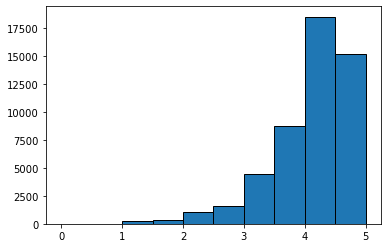

In [27]:
# YOUR CODE HERE
import matplotlib.pyplot as plt

plt.hist(beer_reviews['review/overall'], bins=10, ec='black')
plt.show()

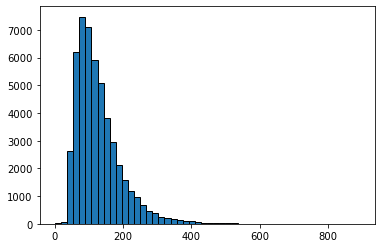

In [28]:
plt.hist(beer_reviews['review/text_len'], bins=50, ec='black')
plt.show()

**6.4** Is there a correlation between age (`user/ageInSeconds`) and ABV (`beer/ABV`)? That is, do older people tend to prefer a. Beer with higher ABV b. Beer with lower ABV c. No correlation. - **1.5 points**

Note - First, drop all rows where `user/ageInSeconds` is `null`. Then, convert `ageInSeconds` to `ageInYears`. Then, check for correlation between age and ABV.

In [29]:
# YOUR CODE HERE
beer_reviews['user/ageInYears'] = beer_reviews['user/ageInSeconds'].apply(lambda x: round(x / 31536000, 2))
beer_reviews['beer/ABV'].corr(beer_reviews['user/ageInYears'])

-0.07293447558092783

No correlation